# Import Library

In [28]:
import os  #case connect via OS
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.utils import img_to_array
import tensorflow as tf
import numpy as np
import cv2
import pandas as pd
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import graphviz
from ann_visualizer.visualize import ann_viz

In [2]:
X_Train = []
Y_Train = []
X_Test = []
Y_Test = []
class_name = []

In [3]:
#นำ name_folder_trainset มาใส่ใน array
directory_train = 'dataset/train'
folder_train = [folder for folder in os.listdir(directory_train) if os.path.isdir(os.path.join(directory_train, folder))]
print(folder_train)

['BED-DOUBLE', 'BED-SINGLE', 'DOOR-DOUBLE', 'DOOR-SINGLE', 'DOOR-WINDOWED', 'SHOWER', 'SINK', 'SOFA-CORNER', 'SOFA-ONE', 'SOFA-THREE', 'SOFA-TWO', 'TABLE-DINNER', 'TOILET', 'WASHBASIN', 'WINDOW']


In [4]:
directory_test = 'dataset/test'
folder_test = [folder for folder in os.listdir(directory_test) if os.path.isdir(os.path.join(directory_test, folder))]
print(folder_test)

['BED-DOUBLE', 'BED-SINGLE', 'DOOR-DOUBLE', 'DOOR-SINGLE', 'DOOR-WINDOWED', 'SHOWER', 'SINK', 'SOFA-CORNER', 'SOFA-ONE', 'SOFA-THREE', 'SOFA-TWO', 'STOVE-OVEN', 'TABLE-DINNER', 'TOILET', 'WASHBASIN', 'WINDOW']


In [5]:
class_name = folder_train + list(set(folder_train) - set(folder_test))
print(class_name)
print(len(class_name))

['BED-DOUBLE', 'BED-SINGLE', 'DOOR-DOUBLE', 'DOOR-SINGLE', 'DOOR-WINDOWED', 'SHOWER', 'SINK', 'SOFA-CORNER', 'SOFA-ONE', 'SOFA-THREE', 'SOFA-TWO', 'TABLE-DINNER', 'TOILET', 'WASHBASIN', 'WINDOW']
15


In [6]:
for i, folder in enumerate(class_name):
  empty_array = np.zeros(len(class_name))
  empty_array[i] = 1
  files = os.listdir(directory_train+"/"+folder)
  count = 0
  for my_file in files:
    count += 1
    img = load_img(directory_train+"/"+folder+"/"+my_file)
    img = img.resize((250,250))
    img = img_to_array(img)
    Y_Train.append(empty_array)
    X_Train.append(img)
  print(folder, count)

BED-DOUBLE 1170
BED-SINGLE 810
DOOR-DOUBLE 684
DOOR-SINGLE 1224
DOOR-WINDOWED 342
SHOWER 1080
SINK 684
SOFA-CORNER 306
SOFA-ONE 936
SOFA-THREE 756
SOFA-TWO 648
TABLE-DINNER 1998
TOILET 1206
WASHBASIN 1152
WINDOW 900


In [7]:
for i, folder in enumerate(class_name):
  empty_array = np.zeros(len(class_name))
  empty_array[i] = 1
  files = os.listdir(directory_test+"/"+folder)
  count = 0
  for my_file in files:
    count += 1
    img = load_img(directory_test+"/"+folder+"/"+my_file)
    img = img.resize((250,250))
    img = img_to_array(img)
    Y_Test.append(empty_array)
    X_Test.append(img)
  print(folder, count)

BED-DOUBLE 390
BED-SINGLE 270
DOOR-DOUBLE 228
DOOR-SINGLE 408
DOOR-WINDOWED 114
SHOWER 360
SINK 228
SOFA-CORNER 102
SOFA-ONE 312
SOFA-THREE 252
SOFA-TWO 216
TABLE-DINNER 666
TOILET 402
WASHBASIN 384
WINDOW 300


In [8]:
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)
X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)

In [9]:
Vector = 250*250*3
X_Train = X_Train.reshape(len(Y_Train),250,250,3)
X_Test = X_Test.reshape(len(Y_Test),250,250,3)

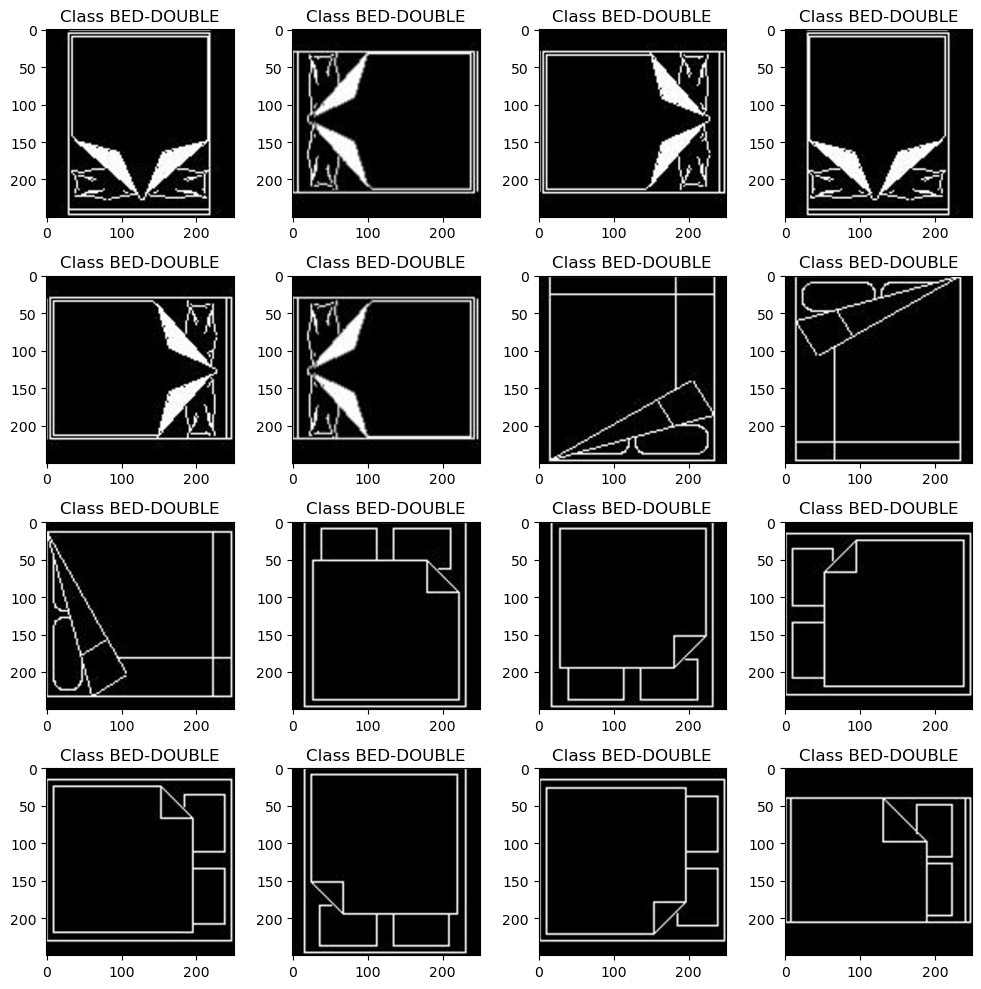

In [10]:
plt.rcParams['figure.figsize'] = (10,10) # change figure size to plot graph

# นำข้อมูลใน Dataset ออกมาแสดง แค่ 16 ตัวโดยจะแสดงเป็น 4 แถว 4 คอลัม
for i in range(16):
    plt.subplot(4,4,i+1)
    img_array = X_Train[i]
    plt.imshow(np.uint8(img_array))
    cl = np.argmax(Y_Train[i])
    plt.title("Class {}".format(class_name[cl]))

plt.tight_layout()

In [11]:
# Input
model = Sequential()
model.add(Dense(64, input_shape=((250, 250, 3)), input_dim=64))

# Hidden
model.add(Dropout(0.2))
model.add(Dense(32,  activation='relu'))
# model.add(Dense(16,  activation='relu'))

# Output
model.add(Flatten())
model.add(Dense(len(class_name), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 83, 83, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 83, 83, 64)        0         
                                                                 
 dense (Dense)               (None, 83, 83, 32)        2080      
                                                                 
 flatten (Flatten)           (None, 220448)            0         
                                                                 
 dense_1 (Dense)             (None, 15)                3306735   
                                                        

In [12]:
#ann_viz(model, filename='ANN_model.gv',title=" Neural Network model from ANN")
#graph_file = graphviz.Source.from_file('ANN_model.gv')

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(X_Train, Y_Train, batch_size=5, epochs=5, validation_data=(X_Test, Y_Test))

Epoch 1/5
2780/2780 [==============================] - 258s 92ms/step - loss: 3.2810 - accuracy: 0.7623 - val_loss: 0.3661 - val_accuracy: 0.8858
Epoch 2/5
2780/2780 [==============================] - 245s 88ms/step - loss: 0.1328 - accuracy: 0.9638 - val_loss: 0.2762 - val_accuracy: 0.9352
Epoch 3/5
2780/2780 [==============================] - 241s 87ms/step - loss: 0.0748 - accuracy: 0.9803 - val_loss: 0.2613 - val_accuracy: 0.9529
Epoch 4/5
2780/2780 [==============================] - 243s 88ms/step - loss: 0.0890 - accuracy: 0.9805 - val_loss: 0.4015 - val_accuracy: 0.9374
Epoch 5/5
2780/2780 [==============================] - 243s 87ms/step - loss: 0.0574 - accuracy: 0.9882 - val_loss: 0.6345 - val_accuracy: 0.9361


In [15]:
score = model.evaluate(X_Train, Y_Train, verbose = 0)
print('Train loss : ', score[0])
print('Train accuracy : ', score[1])

Train loss :  0.05775458365678787
Train accuracy :  0.9885578751564026


In [16]:
score1 = model.evaluate(X_Test, Y_Test, verbose = 0)
print('Test loss : ', score1[0])
print('Test accuracy : ', score1[1])

Test loss :  0.6345420479774475
Test accuracy :  0.936096727848053


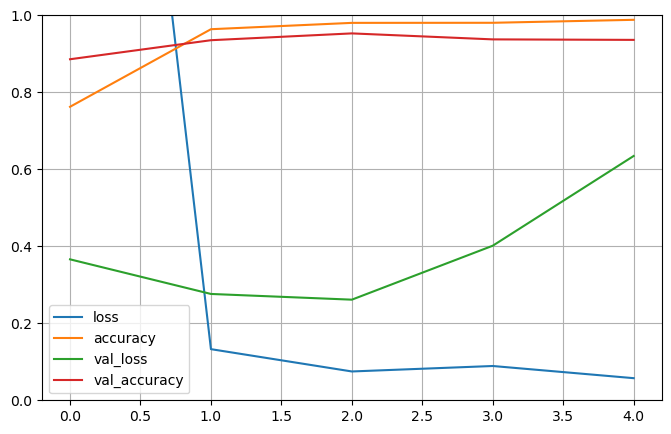

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [33]:
y_pred = model.predict(X_Test)

y_test_class = np.argmax(Y_Test,axis=-1)
y_pred_class = np.argmax(y_pred,axis=-1)

print(confusion_matrix(y_test_class,y_pred_class))

145/145 [==============================] - 15s 102ms/step
[[345   4   8   4   0   7   0   3   5   0   3   0   4   6   1]
 [  6 190  16   1   0   2   0   2   0   3  12  14   4   2  18]
 [  0   0 227   0   1   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0 404   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   9   0 102   0   0   1   0   0   2   0   0   0   0]
 [  3   0   3   0   0 330   0   5   5   1   5   0   2   6   0]
 [  1   1   6   0   0   0 210   0   0   1   4   0   4   0   1]
 [  0   0   2   1   0   0   0  81   2   0   3   4   1   5   3]
 [  0   0   0   0   0   2   0   1 298   0   0   0   0  11   0]
 [  0   0   1   0   2   0   0   0   0 232   6   0   0   0  11]
 [  0   0   1   0   0   0   0   1   0   1 212   1   0   0   0]
 [  0   1   1   3   0   1   0   3   1   1   0 648   2   3   2]
 [  2   1   1   0   0   4   0   0   0   0   0   2 386   6   0]
 [  0   0   3   0   0   0   0   0   3   0   1   4   0 373   0]
 [  0   0   0   0   0   0   0   0   0   0   2   0   0   0 29

In [73]:
print('F1 Score: %.3f' % f1_score(y_test_class, y_pred_class, average='macro'))
	
print('Accuracy: %.3f' % (accuracy_score(y_test_class, y_pred_class) * 100))
	
print('Recall: %.3f' % recall_score(y_test_class, y_pred_class, average='macro'))
	
print('Precision: %.3f' % precision_score(y_test_class, y_pred_class, average='macro'))

F1 Score: 0.924
Accuracy: 93.610
Recall: 0.924
Precision: 0.931


In [19]:
test_predict = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
result = test_predict.predict(X_Test)
for i in range(16):
  print(class_name[int(np.argmax(result[i]))])

145/145 [==============================] - 14s 98ms/step
WASHBASIN
SHOWER
BED-DOUBLE
SOFA-ONE
SHOWER
BED-DOUBLE
SHOWER
SHOWER
DOOR-DOUBLE
SOFA-CORNER
BED-DOUBLE
WASHBASIN
BED-DOUBLE
TOILET
BED-DOUBLE
BED-DOUBLE


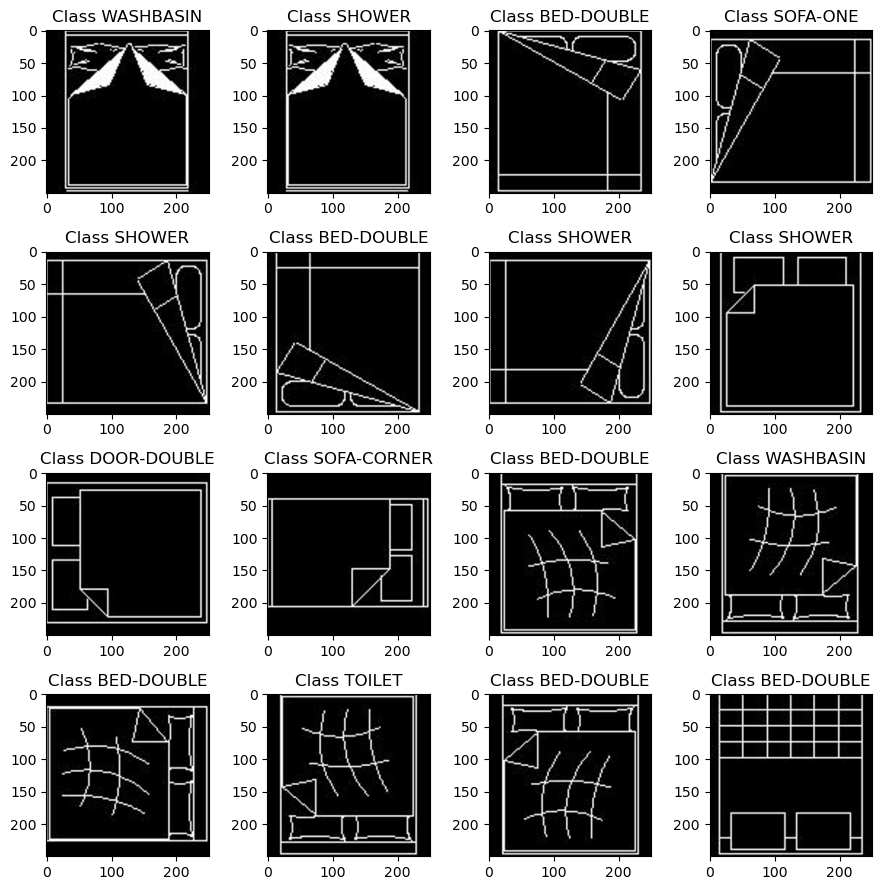

In [20]:
plt.rcParams['figure.figsize'] = (9,9) # change figure size to plot graph

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(np.uint8(X_Test[i]))
    cl = np.argmax(result[i])
    plt.title("Class {}".format(class_name[cl]))
plt.tight_layout()

# Export Model

In [74]:
model.save('ann.h5')

c:\Users\phoom\miniconda3\envs\aucc\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
